In [30]:
from typing import List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [31]:
X, y = make_regression(n_samples=500, n_features=1, noise=25)
X_train, X_test, y_train, y_test = train_test_split(X, y)

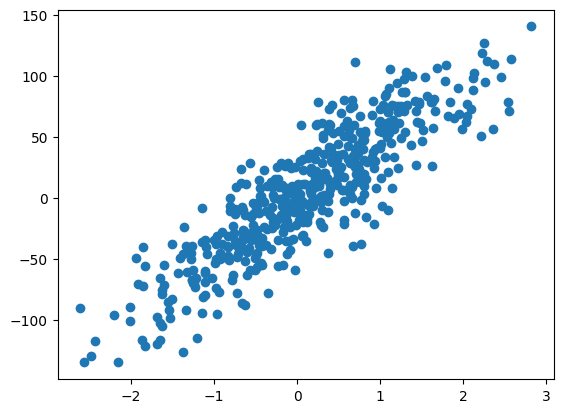

In [32]:
plt.scatter(X, y)

In [44]:
class PolynomialRegressor:
    def __init__(self) -> None:
        self.learning_rate = 0.001
        self.losses = np.array([], dtype=float)
    
    def calculate_grads(self, x:List[float], x_power:int, y:float, true_label:float) -> Tuple[float, float]:
        der_lw = 2 * np.power(x, x_power) * (y - true_label)
        der_lb = 2 * (y - true_label)
        
        return der_lw, der_lb
    
    def fit(self, X:List[List[float]], y:List[float]) -> None:
        self.X, self.y = X, y
        self.weights = np.zeros(self.X.shape[1], dtype=float)
        self.b = 0
        
        for epoch in range(10):
            for i in range(self.X.shape[0]):
                y_pred = self.predict(self.X[i])

                #calculate current loss and add to losses list
                loss = (self.y[i] - y_pred)
                self.losses = np.append(self.losses, loss)

                #calculate grads
                der_lw, der_lb = self.calculate_grads(x=self.X[i], x_power=(self.X.shape[1]-i), y=y_pred, true_label=self.y[i])

                #update weights
                self.weights = self.weights - self.learning_rate * der_lw
                self.b = self.b - self.learning_rate * der_lb
            
        
    def predict(self, X:List[List[float]]) -> List[float]:
        y = 0
        
        for i in range(X.shape[0]):
            y += np.power(X[i], X.shape[0] - i) * self.weights[i]
        
        return y + self.b
    

In [45]:
my_regr = PolynomialRegressor()
my_regr.fit(X_train, y_train)

/var/folders/1s/tsdn68ps7_sc32ggkmy293y80000gn/T/ipykernel_1459/3967383894.py:7: RuntimeWarning: overflow encountered in multiply
  der_lw = 2 * np.power(x, x_power) * (y - true_label)
/var/folders/1s/tsdn68ps7_sc32ggkmy293y80000gn/T/ipykernel_1459/3967383894.py:29: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.learning_rate * der_lw
/var/folders/1s/tsdn68ps7_sc32ggkmy293y80000gn/T/ipykernel_1459/3967383894.py:7: RuntimeWarning: overflow encountered in power
  der_lw = 2 * np.power(x, x_power) * (y - true_label)
